# Tinytol apperture design
---
### 15mm apperture testing
#### Single half wave step at 525nm (central green band)
**What is the ideal pupil design that gives a central peak brighness equal to that of the outer peaks (bed of nails)**

1/10$^{th}$ of a wavelength singusoidal grating (only a single dimension)

use spiral phase plate to invert sinusoidal function

central region should be ~1/10$^{th}$ total pupil size

In [56]:
# Add local scripts to module search path
import sys
import os

from pathlib import Path
path = str(Path().resolve())
sys.path.append((path[0:len(path)-len("notebooks/Louis")]) + "toliman-proper")

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

import proper
proper.print_it = False

from prescription_quad import prescription_quad
from proper_tools import form_detector_image
from spirals import binarized_ringed_flipped

# def binarized_ringed_525_scaled(r, phi, r_max=15., r_min=0., r_split=10):
#     phase = 525.*1e-9*0.5 # Has units of nm
#     return binarized_ringed_flipped(r, phi, phase, r_max=r_max, r_min=r_min, r_split=r_split)

def binarized_ringed_525_scaled(r, phi, r_max=20., r_min=0., r_split=1):
    phase = 525.*1e-9*0.5 # Has units of nm
    return binarized_ringed_flipped(r, phi, phase, r_max=r_max, r_min=r_min, r_split=r_split)


from spectrum_gen_2 import get_spec, get_counts
from FT_model import model_FT
from Bayer import get_red, get_green, get_blue
from get_wf import get_wf

prescription = 'prescription_quad'

image_path = "/Users/louis/special_project/toliman/image_modelling/notebooks/Louis/Images/pupil_testing"

def show_pupil(tinytol_settings):
    tinytol_settings['get_wf'] = True
    tinytol_settings['beam_ratio'] = 0.99
    wfo, wf, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

    tinytol_settings['get_wf'] = False
    tinytol_settings['beam_ratio'] = ratio
    
    return wf

def perform_FT(wf, tinytol_settings, npixels, detector_pitch):  
    mask = wf
    mask_size = tinytol_settings['diam']
    chip_dim = npixels
    foc_length = tinytol_settings['m1_fl']
    pix_size = detector_pitch

    image = model_FT(mask, mask_size, chip_dim, [wl_vals[0]*1e-6], foc_length, pix_size)
    return image

In [57]:
fl = 0.15 # Focal length
app = 0.015 # Apperture (m)
detector_pitch = 1.12e-6 # m/pixel on detector (pixel spacing)
spiral = binarized_ringed_525_scaled # Spiral function to be run
gridsize = 2048 # size of the grid that the simulation is run on
npixels = 1024 # Size of detector, in pixels
ratio = 0.5 # ratio  of gridsize to appreture size (ignore)

tinytol_settings = {
                    'diam': app,                # telescope diameter in meters
                    'm1_fl': fl,                # primary focal length (m)
                    'beam_ratio': ratio,        # Initial beam width/grid width
                    'opd_func': spiral,         # Phase function applied to appreture
                    }

wl_vals = [0.525]    # Wavelength values (micrometers)
wl_weights = [1.]    # Wavelength relative intensities

source = {
            'wavelengths': wl_vals,
            'weights': wl_weights,
            'settings': tinytol_settings
            }

sources = [source]

In [58]:
%%time
image = form_detector_image(prescription, sources, gridsize, detector_pitch, npixels)

CPU times: user 1.79 s, sys: 277 ms, total: 2.07 s
Wall time: 7.74 s


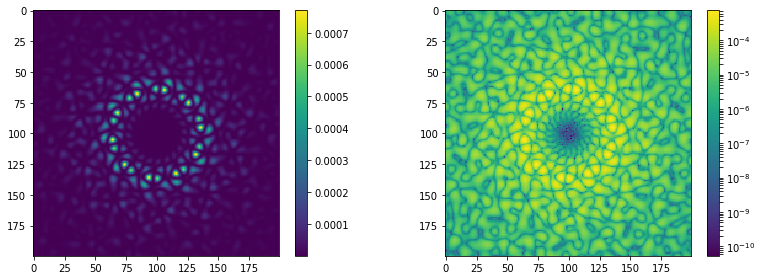

In [59]:
size = 200
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

c = image.shape[0]/2
im_out = image[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)]
im_out = im_out/np.sum(im_out)

im = axs[0].imshow(im_out)
plt.colorbar(im,ax=axs[0],fraction=0.046, pad=0.04)
    
im = axs[1].imshow(im_out,norm=LogNorm())
plt.colorbar(im,ax=axs[1],fraction=0.046, pad=0.04)
fig.tight_layout()
fig.savefig(image_path + "simple_pupil_grouped.jpg", bbox_inches='tight')

Got wavefront


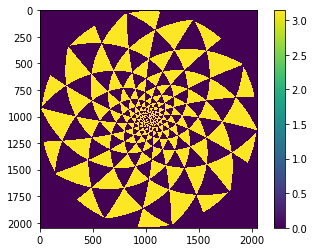

CPU times: user 9.62 s, sys: 284 ms, total: 9.9 s
Wall time: 8.47 s


In [60]:
%%time

wf = show_pupil(tinytol_settings)

plt.imshow(np.abs(np.angle(wf)))#,cmap='prism')
plt.colorbar()
plt.savefig(image_path + "phase.jpg", bbox_inches='tight')
plt.show()

In [27]:
%%time

mask = wf
mask_size = tinytol_settings['diam']
chip_dim = npixels
foc_length = tinytol_settings['m1_fl']
pix_size = detector_pitch

image = model_FT(mask, mask_size, chip_dim, [wl_vals[0]*1e-6], foc_length, pix_size)

CPU times: user 12.5 s, sys: 4.4 s, total: 16.9 s
Wall time: 11.2 s


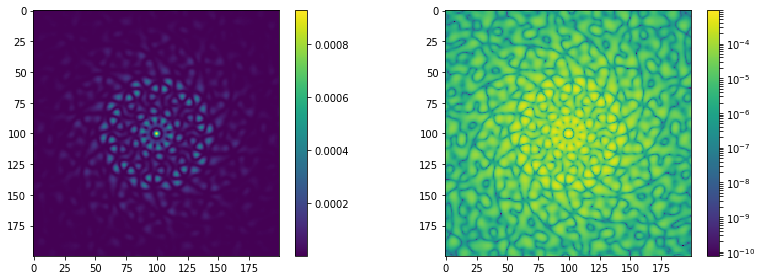

In [28]:
size = 200
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

c = image.shape[0]/2
im_out = image[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)]
im_out = im_out/np.sum(im_out)

im = axs[0].imshow(im_out)
plt.colorbar(im,ax=axs[0],fraction=0.046, pad=0.04)
    
im = axs[1].imshow(im_out,norm=LogNorm())
plt.colorbar(im,ax=axs[1],fraction=0.046, pad=0.04)
fig.tight_layout()
fig.savefig(image_path + "simple_pupil_FT_grouped.jpg", bbox_inches='tight')

___

Got wavefront


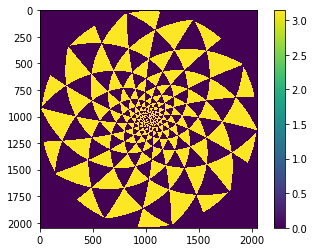

CPU times: user 9.53 s, sys: 287 ms, total: 9.81 s
Wall time: 8.3 s


In [84]:
%%time

def binarized_ringed_525_scaled(r, phi, r_max=15., r_min=2., r_split=5):
    phase = 525.*1e-9*0.5 # Has units of nm
    return binarized_ringed_flipped(r, phi, phase, r_max=r_max, r_min=r_min, r_split=r_split)

def show_pupil(tinytol_settings):
    tinytol_settings['get_wf'] = True
    tinytol_settings['beam_ratio'] = 0.99
    wfo, wf, sampling = prescription_quad(wl_vals[0]*1e-6,gridsize,PASSVALUE=tinytol_settings)

    tinytol_settings['get_wf'] = False
    tinytol_settings['beam_ratio'] = ratio
    
    return wf

wf = show_pupil(tinytol_settings)

plt.imshow(np.abs(np.angle(wf))))
plt.colorbar()
plt.savefig(image_path + "phase.jpg", bbox_inches='tight')
plt.show()

In [94]:
print(type(wf[0][0]))

# array size = gridsize
central = np.floor(gridsize)

num = np.complex128(-1 + 0j)
print(np.abs(num))
print(np.angle(num))

count = 0
for i in range(gridsize):
    for j in range(gridsize):
        if np.sqrt(pow(abs(central-i),2) + pow(abs(central-j),2)) < 1000:
            count += 1
            wf[i][j] = num
print(count)

<class 'numpy.complex128'>
1.0
3.141592653589793
784381


Got wavefront


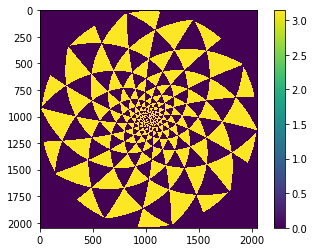

In [95]:
wf = show_pupil(tinytol_settings)

plt.imshow(np.abs(np.angle(wf)))#,cmap='prism')
plt.colorbar()
plt.savefig(image_path + "phase.jpg", bbox_inches='tight')
plt.show()

CPU times: user 13.2 s, sys: 4.26 s, total: 17.5 s
Wall time: 12 s


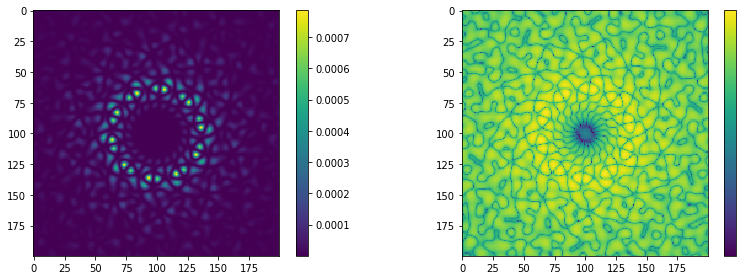

In [62]:
%%time

# def perform_FT(wf, tinytol_settings, npixels, detector_pitch):  
#     mask = wf
#     mask_size = tinytol_settings['diam']
#     chip_dim = npixels
#     foc_length = tinytol_settings['m1_fl']
#     pix_size = detector_pitch

#     image = model_FT(mask, mask_size, chip_dim, [wl_vals[0]*1e-6], foc_length, pix_size)
#     return image

image = perform_FT(wf, tinytol_settings, npixels, detector_pitch)

size = 200
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

c = image.shape[0]/2
im_out = image[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)]
im_out = im_out/np.sum(im_out)

im = axs[0].imshow(im_out)
plt.colorbar(im,ax=axs[0],fraction=0.046, pad=0.04)
    
im = axs[1].imshow(im_out,norm=LogNorm())
plt.colorbar(im,ax=axs[1],fraction=0.046, pad=0.04)
fig.tight_layout()
fig.savefig(image_path + "simple_pupil_FT_grouped.jpg", bbox_inches='tight')